# Fake News Prediction

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

C:\Anaconda_latest\envs\NLP_new_project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
true_news_df = pd.read_csv('True.csv')
fake_news_df = pd.read_csv('Fake.csv')

In [3]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news_df.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
true_news_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

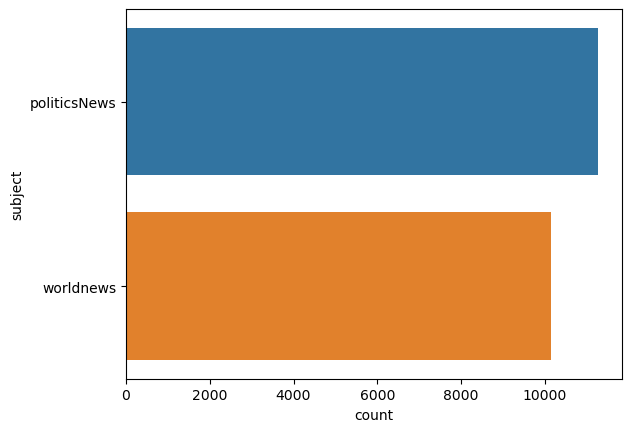

In [6]:
sns.countplot(data = true_news_df, y = 'subject')
plt.show()

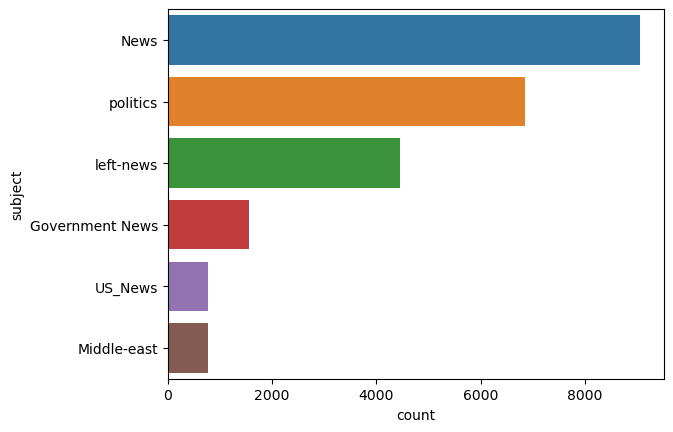

In [7]:
sns.countplot(data = fake_news_df, y = 'subject', 
              order = fake_news_df['subject'].value_counts().index)
plt.show()

In [8]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true_news_df['is_fake'] = 0
fake_news_df['is_fake'] = 1
df_final = pd.concat([true_news_df, fake_news_df]).reset_index(drop = True)

In [10]:
df_final.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


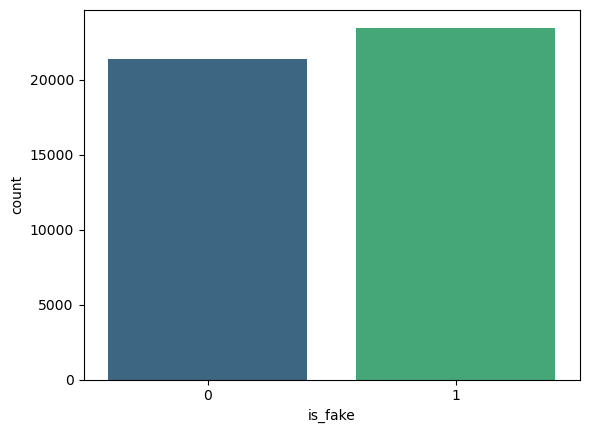

In [11]:
sns.countplot(data = df_final, x = 'is_fake', palette = 'viridis')
plt.show()

In [12]:
df_final.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [13]:
df_final.drop(['date'], axis = 1, inplace = True)

In [14]:
df_final.head()

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [15]:
import nltk

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\suhas
[nltk_data]     maddali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
english_stopwords = stopwords.words('english')

In [18]:
# Printing the first 10 stopwords we are using in english
english_stopwords[0: 10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
import string

In [20]:
import wordcloud
import missingno as msno

In [21]:
import missingno as msno

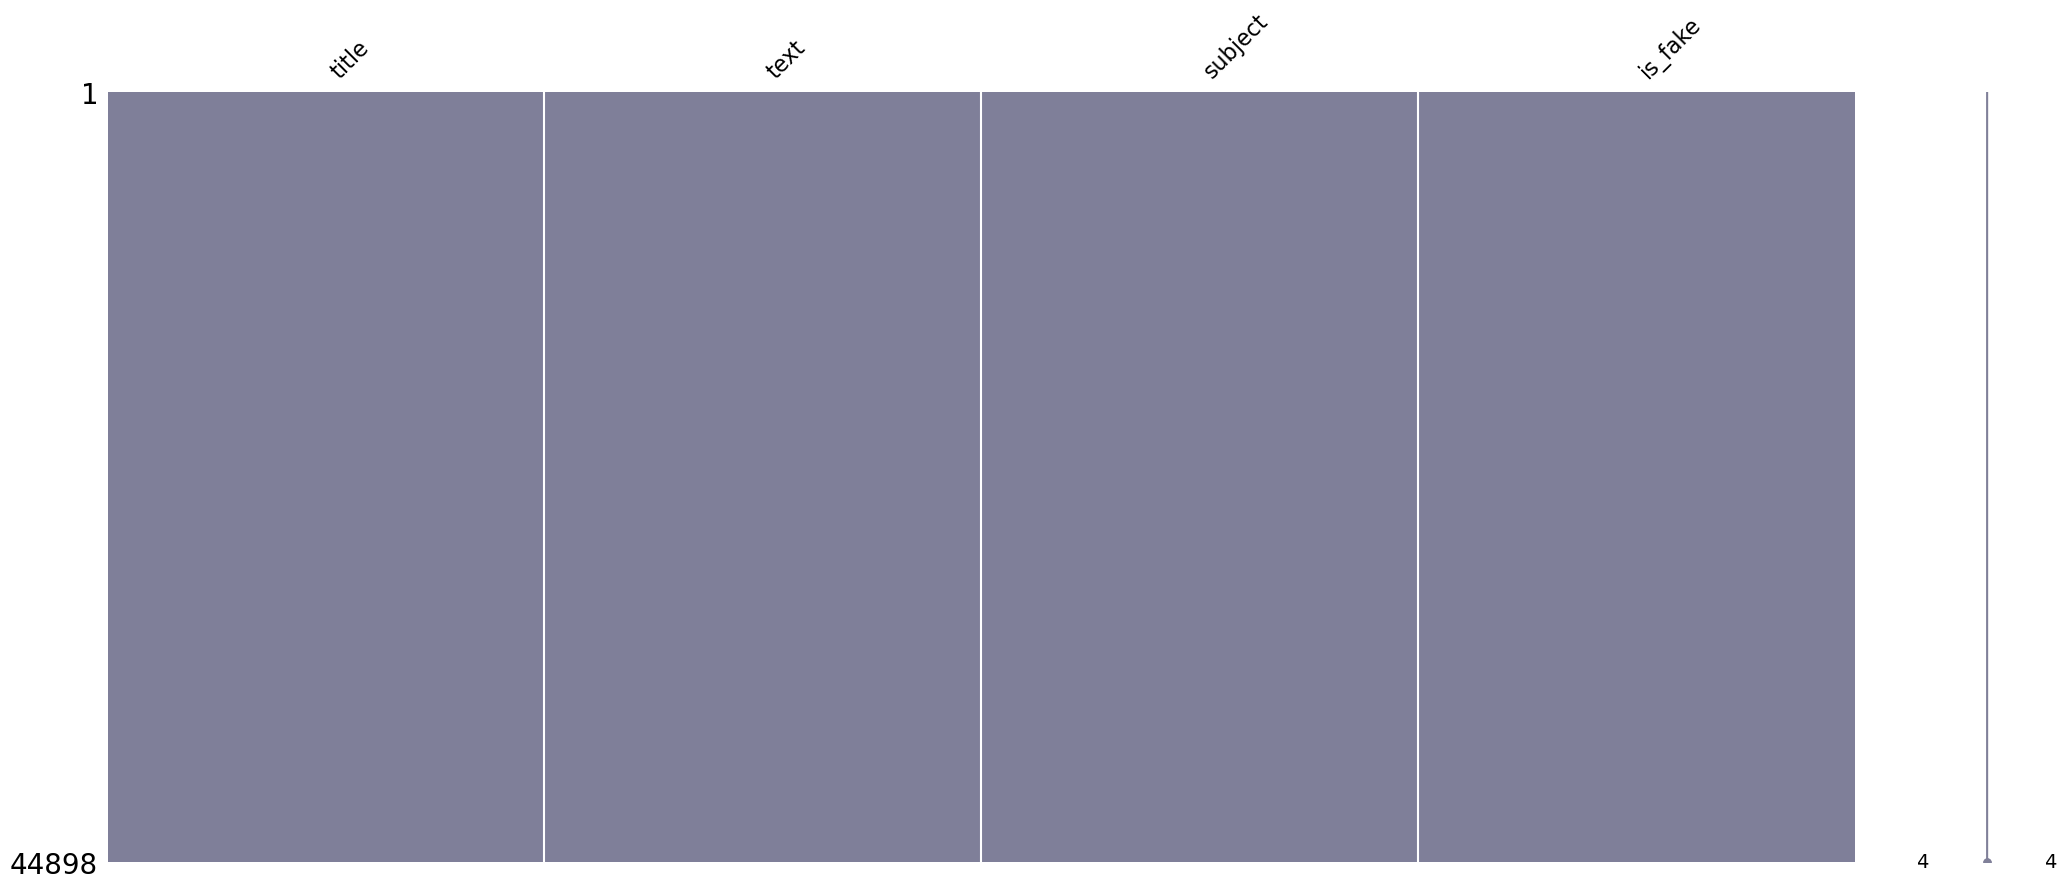

In [22]:
msno.matrix(df_final, color = (0.5, 0.5, 0.6))
plt.show()

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   is_fake  44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [24]:
df_final.head()

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [25]:
wordcloud.WordCloud()

In [26]:
def text_preprocessor(text):
    
    text_preprocessed = []
    text = text.translate(str.maketrans('', '', string.punctuation)) # Removes punctuations
    for word in text.split(' '): # Splits the text into words
        # print(word)
        word = word.lower()
        lemmatizer = WordNetLemmatizer()
        word = lemmatizer.lemmatize(word)
        if word not in english_stopwords:
            text_preprocessed.append(word)
    text_preprocessed = ' '.join(text_preprocessed)
    return text_preprocessed

In [27]:
df_final.head()

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0


In [28]:
df_final['title preprocessed'] = df_final['title'].apply(text_preprocessor)

In [29]:
df_final.head()

,title,text,subject,is_fake,title preprocessed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,u budget fight loom republican flip fiscal script
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,u military accept transgender recruit monday p...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,senior u republican senator let mr mueller job
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,trump want postal service charge much amazon s...


In [30]:
# This cell can take a long time as we are preprocessing the entire text document
# It can execute in about 5 minutes
df_final['text preprocessed'] = df_final['text'].apply(text_preprocessor)

In [31]:
df_final.head()

,title,text,subject,is_fake,title preprocessed,text preprocessed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,u budget fight loom republican flip fiscal script,washington reuters head conservative republic...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,u military accept transgender recruit monday p...,washington reuters transgender people allowed...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,senior u republican senator let mr mueller job,washington reuters special counsel investigat...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,trump want postal service charge much amazon s...,seattlewashington reuters president donald tr...


In [32]:
df_final.drop(['title', 'text'], axis = 1, inplace = True)

In [33]:
df_final.head()

,subject,is_fake,title preprocessed,text preprocessed
0,politicsNews,0,u budget fight loom republican flip fiscal script,washington reuters head conservative republic...
1,politicsNews,0,u military accept transgender recruit monday p...,washington reuters transgender people allowed...
2,politicsNews,0,senior u republican senator let mr mueller job,washington reuters special counsel investigat...
3,politicsNews,0,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geo...
4,politicsNews,0,trump want postal service charge much amazon s...,seattlewashington reuters president donald tr...


In [34]:
fake_news = df_final[df_final.is_fake == 1]['title preprocessed']
true_news = df_final[df_final.is_fake == 0]['title preprocessed']

In [35]:
fake_news_title = ''.join(fake_news.to_list())
true_news_title = ''.join(true_news.to_list())

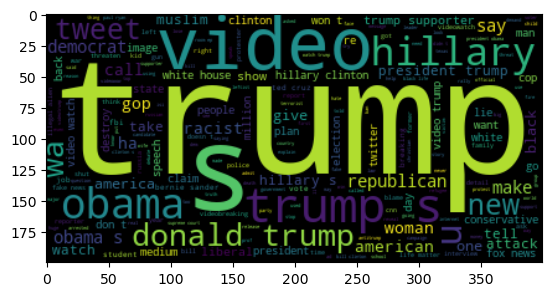

In [36]:
# Fake News Titles
word_cloud = wordcloud.WordCloud().generate(fake_news_title)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.show()

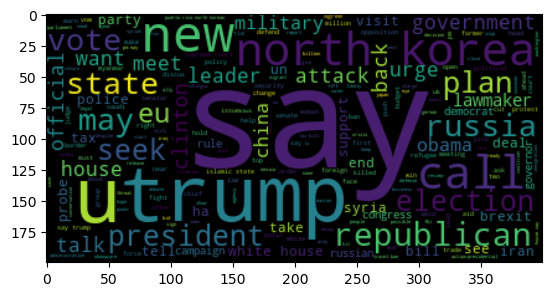

In [37]:
# True News Titles
word_cloud = wordcloud.WordCloud().generate(true_news_title)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.show()

## Encoding Techniques

### Bag of Words (BOW)

In [38]:
X = df_final.drop(['is_fake'], axis = 1)
y = df_final['is_fake']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [40]:
print("The shape of training input data: {}".format(X_train.shape))
print("The shape of testing input data: {}".format(X_test.shape))
print("The shape of training output data: {}".format(y_train.shape))
print("The shape of testing output data: {}".format(y_test.shape))

The shape of training input data: (31428, 3)
The shape of testing input data: (13470, 3)
The shape of training output data: (31428,)
The shape of testing output data: (13470,)


In [41]:
X_train.head()

,subject,title preprocessed,text preprocessed
38563,Government News,lois lerner email snippet reveal bitter btch “...,official lois lerner bitter btch knew wa took ...
316,politicsNews,muellers russia probe cost office 32 million f...,washington reuters u special counsel robert m...
23372,News,donald trump ‘shocked’ group woman heard one ...,reason donald trump decided speak group woman ...
42610,left-news,syrian muslim man whose family perished trip c...,better man risked life wife child get free den...
11585,worldnews,u envoy say expects russia maintain big presen...,washington reuters russia likely maintain big...


In [42]:
vectorizer = CountVectorizer()
title_train_bow = vectorizer.fit_transform(X_train['title preprocessed'])
title_test_bow = vectorizer.transform(X_test['title preprocessed'])

text_train_bow = vectorizer.fit_transform(X_train['text preprocessed'])
text_test_bow = vectorizer.transform(X_test['text preprocessed'])

In [43]:
X_train_transformed = hstack((title_train_bow, text_train_bow))
X_test_transformed = hstack((title_test_bow, text_test_bow))

### Logistic Regression

In [44]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_test_transformed)

In [45]:
y_predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
accuracy_score(y_predictions, y_test)

0.996807720861173

### K Neighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_test_transformed)

In [49]:
print(accuracy_score(y_predictions, y_test))
print(confusion_matrix(y_predictions, y_test))
print(classification_report(y_predictions, y_test))

0.7662212323682257
[[5045 1702]
 [1447 5276]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6747
           1       0.76      0.78      0.77      6723

    accuracy                           0.77     13470
   macro avg       0.77      0.77      0.77     13470
weighted avg       0.77      0.77      0.77     13470



### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
model = GradientBoostingClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_test_transformed)

In [52]:
print(accuracy_score(y_predictions, y_test))
print(confusion_matrix(y_predictions, y_test))
print(classification_report(y_predictions, y_test))

0.9961395694135116
[[6481   41]
 [  11 6937]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6522
           1       0.99      1.00      1.00      6948

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



### Decision Tree Classifier

In [53]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_test_transformed)

In [54]:
print(accuracy_score(y_predictions, y_test))
print(confusion_matrix(y_predictions, y_test))
print(classification_report(y_predictions, y_test))

0.9971789161098737
[[6473   19]
 [  19 6959]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6492
           1       1.00      1.00      1.00      6978

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_test_transformed)

In [57]:
print(accuracy_score(y_predictions, y_test))
print(confusion_matrix(y_predictions, y_test))
print(classification_report(y_predictions, y_test))

0.9904231625835189
[[6455   92]
 [  37 6886]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6547
           1       0.99      0.99      0.99      6923

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



## TFIDF Vectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
vectorizer = TfidfVectorizer()
title_train_tfidf = vectorizer.fit_transform(X_train['title preprocessed'])
title_test_tfidf = vectorizer.transform(X_test['title preprocessed'])

text_train_tfidf = vectorizer.fit_transform(X_train['text preprocessed'])
text_test_tfidf = vectorizer.transform(X_test['text preprocessed'])

In [60]:
X_train_transformed = hstack((title_train_tfidf, text_train_tfidf))
X_test_transformed = hstack((title_test_tfidf, text_test_tfidf))

## Word2Vec Vectorizer

In [61]:
import gensim

In [62]:
from gensim.models import Word2Vec

In [63]:
train_title = [text.split(' ') for text in X_train['title preprocessed']]
test_title = [text.split(' ') for text in X_test['title preprocessed']]

In [64]:
word2vec = Word2Vec(train_title, min_count = 2)

In [65]:
word2vec.wv.similarity('trump', 'hillary')

0.61654294

In [66]:
word2vec.wv.similarity('apple', 'email')

0.80205226

In [67]:
word2vec.wv.most_similar('trump')

[('trump’s', 0.861196756362915),
 ('oliver', 0.8531867861747742),
 ('obama', 0.8469250798225403),
 ('psychiatrist', 0.8407729864120483),
 ('aug', 0.8398065567016602),
 ('anonymous', 0.8300782442092896),
 ('noam', 0.8270716071128845),
 ('trump…blames', 0.8264898657798767),
 ('cream', 0.8224700689315796),
 ('bette', 0.8176900744438171)]

In [68]:
word2vec.wv.most_similar('laptop')

[('funeral', 0.9973785281181335),
 ('flood', 0.9973040223121643),
 ('illegals', 0.9972101449966431),
 ('truck', 0.9970853924751282),
 ('ring', 0.9970752596855164),
 ('museum', 0.9970503449440002),
 ('“refugees”', 0.9966311454772949),
 ('since', 0.9966306090354919),
 ('mass', 0.9966155290603638),
 ('several', 0.996551513671875)]

In [69]:
train_title[0]

['lois',
 'lerner',
 'email',
 'snippet',
 'reveal',
 'bitter',
 'btch',
 '“lincoln',
 'let',
 'south',
 'go…”']

In [70]:
test_title[0]

['factbox',
 'humanitarian',
 'crisis',
 'worsens',
 'bangladesh',
 'many',
 'rohingya',
 'flee',
 'myanmar']

In [71]:
avgword2vec_train = []
for i in range(len(train_title)):
    word2vec_sum = 0
    for j in range(len(train_title[i])):
        try: 
            word2vec_sum = word2vec_sum + word2vec.wv.word_vec(train_title[i][j])           
        except KeyError:
            continue
    avg_word2vec = word2vec_sum / (j + 1)
    avgword2vec_train.append(avg_word2vec)

In [72]:
avgword2vec_df_train = pd.DataFrame()
avgword2vec_df_test = pd.DataFrame()

In [73]:
from tqdm import tqdm 

In [74]:
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [75]:
# This file can take about 5 minutes to run the code cell 

y_train_transformed = []
for i in tqdm(range(len(avgword2vec_train))):
    try:
        avgword2vec_df_train = avgword2vec_df_train.append(pd.DataFrame(avgword2vec_train[i]).T)
        y_train_transformed.append(y_train[i])
    except ValueError:
        continue

100%|████████████████████████████████████████████████████████████████████████████| 31428/31428 [06:35<00:00, 79.38it/s]


In [76]:
avgword2vec_test = []
for i in range(len(test_title)):
    word2vec_sum = 0
    for j in range(len(test_title[i])):
        try: 
            word2vec_sum = word2vec_sum + word2vec.wv.word_vec(test_title[i][j])
        except KeyError: 
            continue
    avg_word2vec = word2vec_sum / (j + 1)
    avgword2vec_test.append(avg_word2vec)

In [77]:
# This file can take about 5 minutes to run the code cell 

y_test_transformed = []
for i in tqdm(range(len(avgword2vec_test))):
    try:
        avgword2vec_df_test = avgword2vec_df_test.append(pd.DataFrame(avgword2vec_test[i]).T)
        y_test_transformed.append(y_test[i])
    except ValueError:
        continue

100%|████████████████████████████████████████████████████████████████████████████| 13470/13470 [02:34<00:00, 87.21it/s]


In [78]:
model = LogisticRegression()
model.fit(avgword2vec_df_train, y_train_transformed)
y_predictions = model.predict(avgword2vec_df_test)

In [79]:
y_predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
accuracy_score(y_predictions, y_test_transformed)

0.9117974608359938

In [81]:
print(classification_report(y_predictions, y_test_transformed))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6402
           1       0.92      0.91      0.92      7067

    accuracy                           0.91     13469
   macro avg       0.91      0.91      0.91     13469
weighted avg       0.91      0.91      0.91     13469



In [99]:
df_final.head()

,subject,is_fake,title preprocessed,text preprocessed
0,politicsNews,0,u budget fight loom republican flip fiscal script,washington reuters head conservative republic...
1,politicsNews,0,u military accept transgender recruit monday p...,washington reuters transgender people allowed...
2,politicsNews,0,senior u republican senator let mr mueller job,washington reuters special counsel investigat...
3,politicsNews,0,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geo...
4,politicsNews,0,trump want postal service charge much amazon s...,seattlewashington reuters president donald tr...


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.3)

In [102]:
X_train.shape

(31428, 3)

## Embedding Representation

In [103]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [104]:
X_train.head()

,subject,title preprocessed,text preprocessed
38563,Government News,lois lerner email snippet reveal bitter btch “...,official lois lerner bitter btch knew wa took ...
316,politicsNews,muellers russia probe cost office 32 million f...,washington reuters u special counsel robert m...
23372,News,donald trump ‘shocked’ group woman heard one ...,reason donald trump decided speak group woman ...
42610,left-news,syrian muslim man whose family perished trip c...,better man risked life wife child get free den...
11585,worldnews,u envoy say expects russia maintain big presen...,washington reuters russia likely maintain big...


In [108]:
text_train = X_train['text preprocessed'].tolist()
text_test = X_test['text preprocessed'].tolist()

In [109]:
vocab_size = 5000

In [111]:
text_train_one_hot = [one_hot(words, vocab_size) for words in text_train]
text_test_one_hot = [one_hot(words, vocab_size) for words in text_test]

In [114]:
text_train_one_hot[0][0: 10]

[3907, 3560, 622, 2260, 1376, 2182, 1865, 3405, 2842, 1640]

In [115]:
sent_length = 1000
embedded_docs = pad_sequences(text_train_one_hot, padding = 'post', maxlen = sent_length)
print(embedded_docs)

[[3907 3560  622 ...    0    0    0]
 [4811 1368 1262 ...    0    0    0]
 [4086 4251 2028 ...    0    0    0]
 ...
 [4811 1368 1262 ...    0    0    0]
 [2780 1368 3115 ...    0    0    0]
 [4811 1368 1262 ...    0    0    0]]


In [117]:
len(embedded_docs)

31428

In [119]:
len(embedded_docs[0])

1000

In [120]:
embedding_vector_features = 100

In [141]:
y_train.shape

(31428,)

In [142]:
X_train.shape

(31428, 3)

## Recurrent Neural Network (RNN)

In [192]:
from tensorflow.keras.preprocessing.text import one_hot

In [193]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [177]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN

In [178]:
embedding_vector_features = 100

In [179]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_features, input_length = sent_length))
model.add(SimpleRNN(128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 100)         500000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 1000, 128)         29312     
                                                                 
 dropout_12 (Dropout)        (None, 1000, 128)         0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1000, 64)          12352     
                                                                 
 dropout_13 (Dropout)        (None, 1000, 64)          0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 1000, 32)          3104      
                                                                 
 dropout_14 (Dropout)        (None, 1000, 32)         

In [180]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, epsilon = 1e-07)

In [181]:
model.compile(optimizer = opt, loss = 'BinaryCrossentropy',
             metrics = ['accuracy'])

In [182]:
X_train_embedded = np.array(embedded_docs).astype('float32')
y_train_new = np.array(y_train).astype('float32').reshape((-1, 1))

In [183]:
X_train_embedded.shape

(31428, 1000)

In [184]:
y_train_new.shape

(31428, 1)

In [187]:
import tensorflow as tf

In [190]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [191]:
tf.config.list_physical_devices('GPU')

[]

In [186]:
model.fit(X_train_embedded, y_train_new, epochs = 2)

Epoch 1/2
 34/983 [>.............................] - ETA: 15:35 - loss: 0.7740 - accuracy: 0.5191

KeyboardInterrupt: 

In [ ]:
print(tf.__version__)

## Gated Recurrent Units (GRU)

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model = Sequential()

model.add(GRU(128, input_shape = (avgword2vec_df_train.shape[1], 1),
         activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.1))

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, epsilon = 1e-07)

In [ ]:
model.compile(optimizer = opt, loss = 'BinaryCrossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train_new, epochs = 2)

## Long Short Term Memory (LSTM)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(128, input_shape = (avgword2vec_df_train.shape[1], 1), activation = 'relu',
               return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(64, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, epsilon = 1e-07)

In [ ]:
model.compile(optimizer = opt, loss = 'BinaryCrossentropy',
             metrics = ['accuracy'])

In [ ]:
avgword2vec_df_train.head()

In [ ]:
numpy_matrix = avgword2vec_df_train.to_numpy()

In [ ]:
model.fit(X_train, y_train_new, epochs = 2)

## Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(128, input_shape = (avgword2vec_df_train.shape[1], 1), 
                       activation = 'relu', return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(64, activation = 'relu', return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, activation = 'relu', return_sequences = True)))
model.add(Dropout(0.1))

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, epsilon = 1e-7)

In [ ]:
model.compile(optimizer = opt, metrics = ['accuracy'], loss = 'BinaryCrossentropy')

In [ ]:
model.fit(X_train, y_train_new, epochs = 2)

In [ ]:
def model_training(train_input, train_output, classifier = None):
    
    if classifier == "Logistic Regression":
        model = LogisticRegression()
        model.fit(train_input, train_output)
        
    elif classifier == "Decision Tree Classifier":
        model = DecisionTreeClassifier()
        model.fit(train_input, train_output)
        
    elif classifier == "Random Forest Classifier":
        model = RandomForestClassifier()
        model.fit(train_input, train_output)
        
    elif classifier == "Gradient Boosting Classifier":
        model = GradientBoostingClassifier()
        model.fit(train_input, train_output)
        
    elif classifier == "Support Vector Classifier":
        model = SVC()
        model.fit(train_input, train_output)
        
    elif classifier == "Naive Bayes Classifier":
        model = GaussianNB()
        model.fit(train_input, train_output)
        
    elif classifier == "K Neighbors Classifier":
        model = KNeighborsClassifier()
        model.fit(train_input, train_output)
    
    return model       

In [ ]:
def model_testing(test_input, model, print_results = True):
    
    y_predictions = model.predict(test_input)
    
    if print_results == True:
        
        print(accuracy_score(y_predictions, y_test))
        print(confusion_matrix(y_predictions, y_test))
        print(classification_report(y_predictions, y_test))
    
    return y_predictions   